In [169]:
import csv
import pandas as pd 

f = open('지출목적별_소비자물가지수.csv', 'r', encoding='euc-kr')
data = csv.reader(f)
data = pd.DataFrame(data)

data.columns = data.iloc[0]
data = data.iloc[1:]
data

,시도별,시점,0 총지수,01 식료품 및 비주류음료,02 주류 및 담배,03 의류 및 신발,04 주택 수도 전기 및 연료,05 가정용품 및 가사 서비스,06 보건,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스
1,전국,1994.01,48.335,36.050,32.965,55.000,48.925,65.098,52.494,42.856,150.605,85.148,35.704,48.259,45.028
2,전국,1994.02,48.873,36.867,33.071,55.186,49.039,65.491,52.632,43.624,150.605,85.447,36.095,49.133,45.143
3,전국,1994.03,49.296,36.981,33.097,55.233,49.154,65.605,52.770,45.320,150.605,85.900,37.578,49.468,45.182
4,전국,1994.04,49.373,36.784,33.148,55.280,49.344,65.660,53.140,45.927,150.605,85.900,37.708,49.637,45.182
5,전국,1994.05,49.412,36.698,33.201,55.420,49.535,65.772,53.463,45.576,150.605,86.125,37.786,49.771,45.334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,전국,2024.06,113.84,120.68,104.54,114.31,114.43,114.37,104.25,114.01,101.32,108.74,105.91,120.77,119.63
367,전국,2024.07,114.13,121.54,104.71,114.38,113.07,115.35,104.27,116.00,101.32,109.45,106.18,121.32,119.78
368,전국,2024.08,114.54,122.99,104.59,114.44,113.92,115.35,104.37,116.17,101.32,109.35,106.41,121.65,119.23
369,전국,2024.09,114.65,124.72,104.48,114.44,115.36,114.95,104.50,113.90,101.32,108.86,106.51,121.02,118.97


In [1]:
data.to_csv("./price_df.csv", header=False)

NameError: name 'data' is not defined

In [3]:
######################################################
# 1. 함수생성 (서울시 지하철호선별 역별 승하차인원)
#    - 파일읽기
#    - database table 에 데이터 입력
######################################################

from tkinter import *
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import random as r
import csv
import datetime
import operator
import pymysql

font_path = 'C:\\Windows\\Fonts\\MalangmalangR.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

#1. 파일 읽기
def file_open(filename):
    f = open(filename,encoding='utf-8')
    data = csv.reader(f)
    data = list(data)
    return data
    for row in data:
        print(row)  # 각 행을 출력해서 확인
    
    return data

# 2. 데이터베이스에 데이터 삽입
def insert_dbtable(csvdata, ip, userid, passwd, dbname):
    # 데이터베이스 연결
    conn = pymysql.connect(host=ip, user=userid, password=passwd, db=dbname, charset='utf8')
    cur = conn.cursor()

    # SQL 쿼리 실행
    sql = """INSERT INTO price_index (date, total_index, food_non_alcoholic, alcoholic_tobacco,
             clothing_footwear, housing_utilities_fuel, household_goods_services, health,
             transport, communication, recreation_culture, education, food_hospitality, other_goods_services)
             VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""

    for row in csvdata:
        # 각 필드를 적절한 데이터 타입으로 변환
        values = (
            row[1],  # date: 문자열 (YYYY.MM)
            float(row[2]), 
            float(row[3]),  
            float(row[4]),  
            float(row[5]),  
            float(row[6]),  
            float(row[7]),  
            float(row[8]),  
            float(row[9]),  
            float(row[10]),  
            float(row[11]),  
            float(row[12]),  
            float(row[13]),  
            float(row[14]),   # 
        )
        cur.execute(sql, values)
    
    conn.commit()
    conn.close()

# 파일 열기 및 데이터베이스에 삽입
data = file_open('./price_df.csv')
insert_dbtable(data, '127.0.0.1', 'root', '1004', 'market_db')

In [51]:
# MySQL DB 연결
conn = pymysql.connect(host='127.0.0.1', user='root', password='1004', db='market_db', charset='utf8')
cur = conn.cursor()

# SQL 쿼리 실행

query = "SELECT YEAR(date) AS year, total_index, clothing_footwear FROM price_index GROUP BY YEAR(date);"

cur.execute(query)

# 결과를 DataFrame으로 변환
columns = [desc[0] for desc in cur.description]  # 컬럼 이름 가져오기
data = cur.fetchall()  # 쿼리 결과 전체 가져오기

# DataFrame으로 변환
df = pd.DataFrame(data, columns=columns)
# 연결 종료
cur.close()
conn.close()

# DataFrame 확인
print(df.head())

   year  total_index  clothing_footwear
0  1994       48.335             55.000
1  1995       50.847             55.978
2  1996       53.289             56.937
3  1997       55.786             57.108
4  1998       60.413             59.816


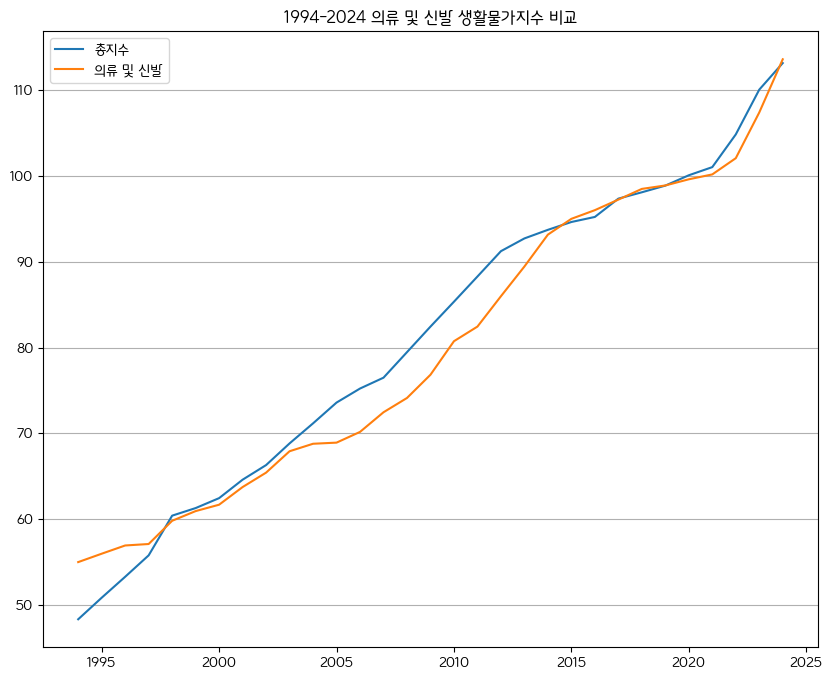

In [61]:
plt.figure(figsize=(10,8))
plt.grid(axis='y')
plt.plot(df['year'],df['total_index'],label='총지수')
plt.plot(df['year'],df['clothing_footwear'],label='의류 및 신발')
plt.title('1994-2024 의류 및 신발 생활물가지수 비교')
plt.legend()
plt.show()

In [125]:
# MySQL DB 연결
conn = pymysql.connect(host='127.0.0.1', user='root', password='1004', db='market_db', charset='utf8')
cur = conn.cursor()

# SQL 쿼리 실행

query = "SELECT YEAR(date) AS year, total_index, clothing_footwear, food_hospitality, household_goods_services, health FROM price_index GROUP BY YEAR(date);"

cur.execute(query)

# 결과를 DataFrame으로 변환
columns = [desc[0] for desc in cur.description]  # 컬럼 이름 가져오기
data = cur.fetchall()  # 쿼리 결과 전체 가져오기

# DataFrame으로 변환
df = pd.DataFrame(data, columns=columns)

    
# 연결 종료
cur.close()
conn.close()

# DataFrame 확인
print(df.head())

   year  total_index  clothing_footwear  food_hospitality  \
0  1994       48.335             55.000            48.259   
1  1995       50.847             55.978            51.351   
2  1996       53.289             56.937            54.350   
3  1997       55.786             57.108            56.665   
4  1998       60.413             59.816            60.453   

   household_goods_services  health  
0                    65.098  52.494  
1                    67.129  55.477  
2                    67.663  59.399  
3                    67.796  60.764  
4                    70.066  63.492  


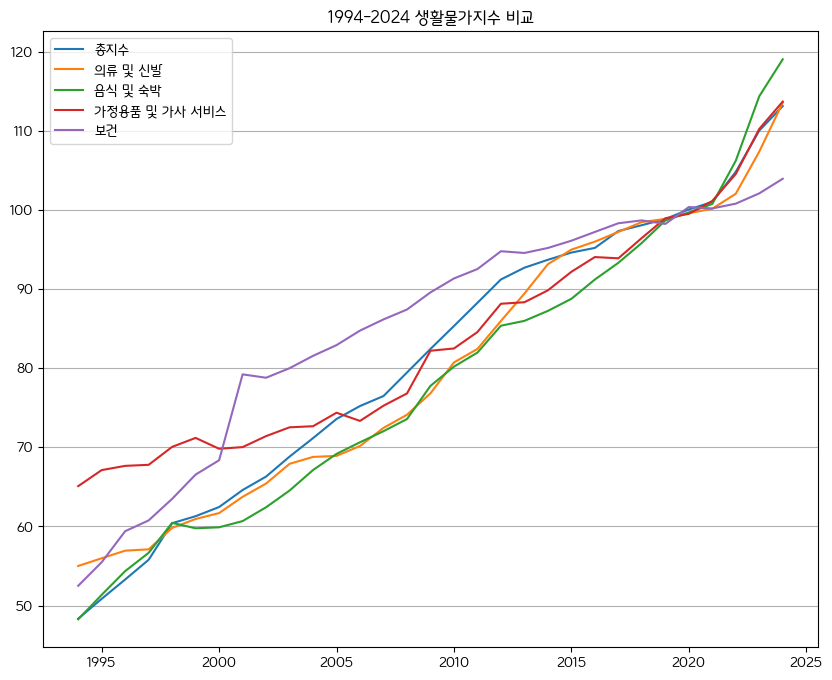

In [127]:
plt.figure(figsize=(10,8))
plt.grid(axis='y')
plt.plot(df['year'],df['total_index'],label='총지수')
plt.plot(df['year'],df['clothing_footwear'],label='의류 및 신발')
plt.plot(df['year'],df['food_hospitality'],label='음식 및 숙박')
plt.plot(df['year'],df['household_goods_services'],label='가정용품 및 가사 서비스')
plt.plot(df['year'],df['health'],label='보건')

plt.title('1994-2024 생활물가지수 비교')
plt.legend()
plt.show()

In [133]:
# MySQL DB 연결
conn = pymysql.connect(host='127.0.0.1', user='root', password='1004', db='market_db', charset='utf8')
cur = conn.cursor()

# SQL 쿼리 실행

query = "SELECT  DATE_FORMAT(date, '%Y-%m') AS yearMonth , total_index, clothing_footwear FROM price_index WHERE YEAR(date) IN (1994,1995,1996,1997);"

cur.execute(query)

# 결과를 DataFrame으로 변환
columns = [desc[0] for desc in cur.description]  # 컬럼 이름 가져오기
data = cur.fetchall()  # 쿼리 결과 전체 가져오기

# DataFrame으로 변환
df = pd.DataFrame(data, columns=columns)

    
# 연결 종료
cur.close()
conn.close()

# DataFrame 확인
print(df.head())

  yearMonth  total_index  clothing_footwear
0   1994-01       48.335             55.000
1   1994-02       48.873             55.186
2   1994-03       49.296             55.233
3   1994-04       49.373             55.280
4   1994-05       49.412             55.420


In [ ]:
import matplotlib.dates as mdates

df['yearMonth'] = pd.to_datetime(df['yearMonth'])

# 그래프 크기 설정
plt.figure(figsize=(8,6))
plt.grid()

# 그래프 그리기
plt.plot(df['yearMonth'],df['total_index'],label='총지수')
plt.plot(df['yearMonth'], df['clothing_footwear'], label='의류 및 신발')

# x축 포맷: 년도만 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# x축 눈금 간격을 년도 단위로 설정
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 눈금 표시

# 제목, 레전드 등 추가
plt.title('1994-1997 의류 및 신발 생활물가지수')
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

In [141]:
# MySQL DB 연결
conn = pymysql.connect(host='127.0.0.1', user='root', password='1004', db='market_db', charset='utf8')
cur = conn.cursor()

# SQL 쿼리 실행

query = "SELECT  DATE_FORMAT(date, '%Y-%m') AS yearMonth , total_index, clothing_footwear FROM price_index WHERE YEAR(date) IN (2023);"

cur.execute(query)

# 결과를 DataFrame으로 변환
columns = [desc[0] for desc in cur.description]  # 컬럼 이름 가져오기
data = cur.fetchall()  # 쿼리 결과 전체 가져오기

# DataFrame으로 변환
df = pd.DataFrame(data, columns=columns)

    
# 연결 종료
cur.close()
conn.close()

# DataFrame 확인
print(df.head())

  yearMonth  total_index  clothing_footwear
0   2023-01       110.07             107.41
1   2023-02       110.33             107.48
2   2023-03       110.52             107.85
3   2023-04       110.77             107.84
4   2023-05       111.13             111.55


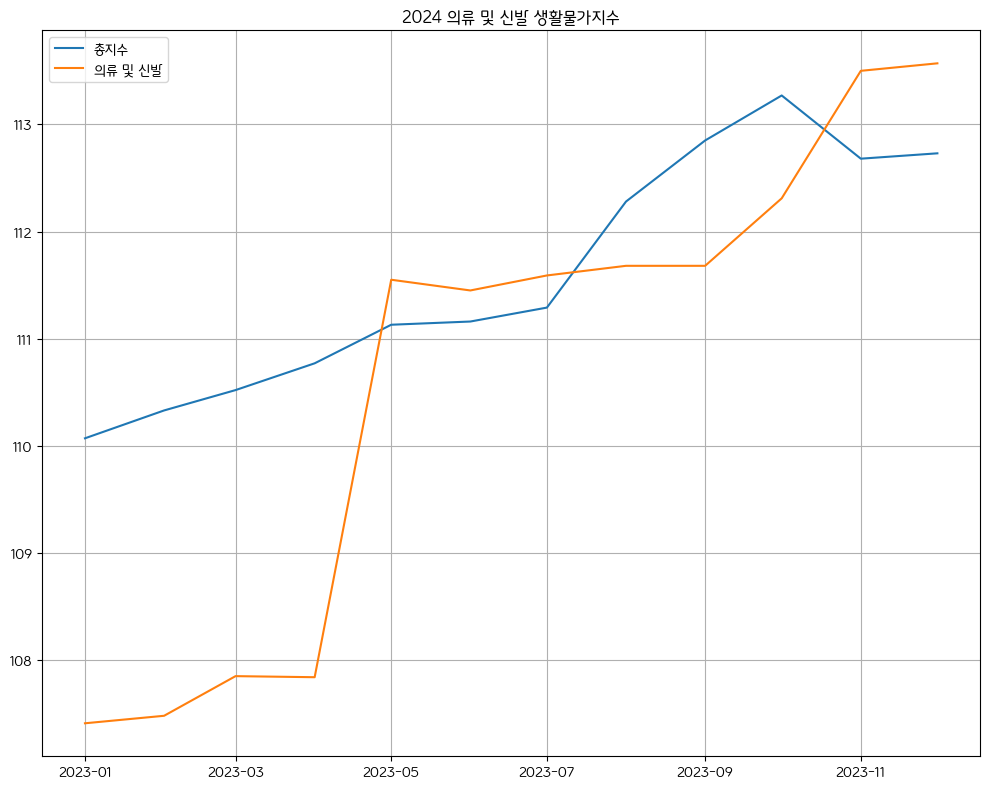

In [145]:
import matplotlib.dates as mdates

df['yearMonth'] = pd.to_datetime(df['yearMonth'])

# 그래프 크기 설정
plt.figure(figsize=(10,8))
plt.grid()

# 그래프 그리기
plt.plot(df['yearMonth'],df['total_index'],label='총지수')
plt.plot(df['yearMonth'], df['clothing_footwear'], label='의류 및 신발')

# 제목, 레전드 등 추가
plt.title('2024 의류 및 신발 생활물가지수')
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

In [157]:
# MySQL DB 연결
conn = pymysql.connect(host='127.0.0.1', user='root', password='1004', db='market_db', charset='utf8')
cur = conn.cursor()

# SQL 쿼리 실행

query = " SELECT year, (sum_cf - LAG(sum_t) OVER (ORDER BY year)) / LAG(sum_t) OVER (ORDER BY year) * 100 AS t_growth_rate,(sum_cf - LAG(sum_cf) OVER (ORDER BY year)) / LAG(sum_cf) OVER (ORDER BY year) * 100 AS cf_growth_rate FROM (SELECT YEAR(date) AS year, SUM(total_index) as sum_t, SUM(clothing_footwear) as sum_cf FROM price_index WHERE YEAR(date) != 2024 GROUP BY YEAR(date)) AS Y; "

cur.execute(query)

# 결과를 DataFrame으로 변환
columns = [desc[0] for desc in cur.description]  # 컬럼 이름 가져오기
data = cur.fetchall()  # 쿼리 결과 전체 가져오기

# DataFrame으로 변환
df = pd.DataFrame(data, columns=columns)

    
# 연결 종료
cur.close()
conn.close()

# DataFrame 확인
print(df.head())

   year  t_growth_rate  cf_growth_rate
0  1994            NaN             NaN
1  1995      13.383280        1.677049
2  1996       9.805012        1.183430
3  1997       6.401473        1.672279
4  1998       5.956662        4.002326


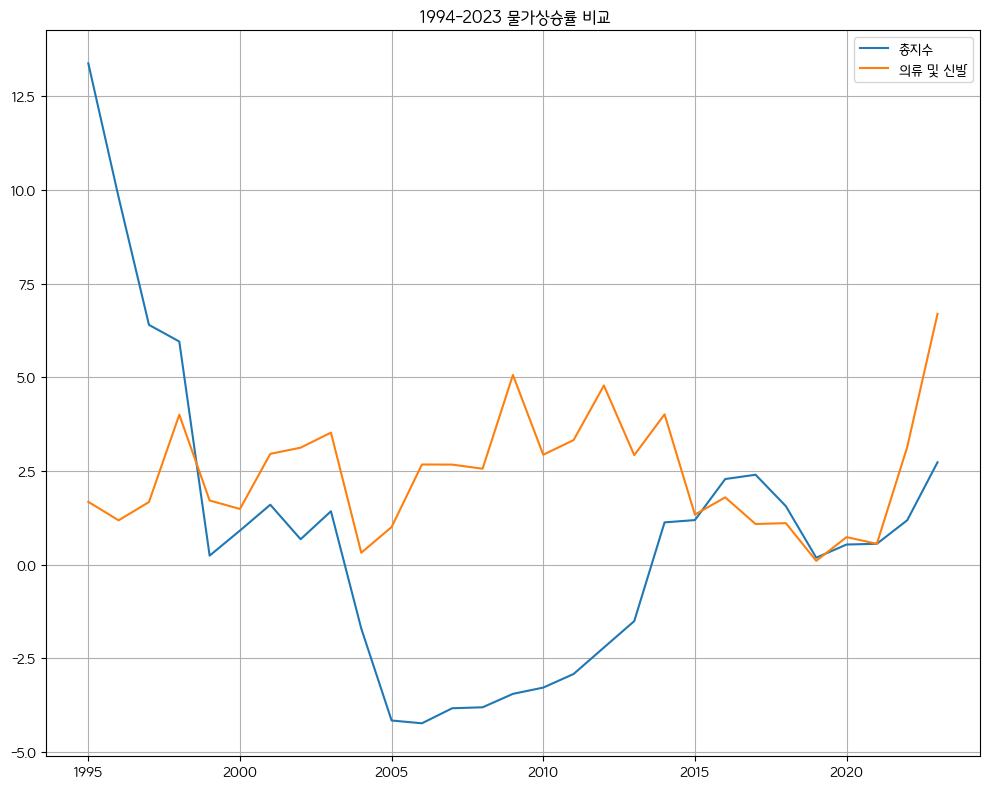

In [159]:
import matplotlib.dates as mdates

# 그래프 크기 설정
plt.figure(figsize=(10,8))
plt.grid()

# 그래프 그리기
plt.plot(df['year'],df['t_growth_rate'],label='총지수')
plt.plot(df['year'], df['cf_growth_rate'], label='의류 및 신발')

# 제목, 레전드 등 추가
plt.title(' 1994-2023 물가상승률 비교')
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()